In [30]:
def u(x):
	return 10*x*x

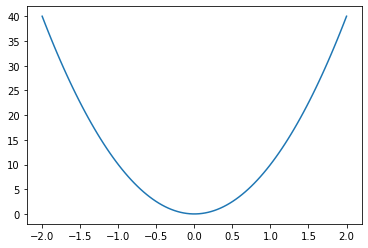

In [31]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2, 2, 100)
plt.plot(x, u(x), label='linear') 

0:  |F(x)| = 143.969; step 1
1:  |F(x)| = 24.5935; step 1
2:  |F(x)| = 12.9465; step 1
3:  |F(x)| = 13.4728; step 1
4:  |F(x)| = 14.5885; step 1
5:  |F(x)| = 16.9262; step 1
6:  |F(x)| = 14.3922; step 1
7:  |F(x)| = 11.462; step 1
8:  |F(x)| = 4.90302; step 1
9:  |F(x)| = 0.959803; step 1
10:  |F(x)| = 0.0367886; step 1
11:  |F(x)| = 0.000846914; step 1
12:  |F(x)| = 5.4368e-05; step 1
13:  |F(x)| = 8.15841e-06; step 1
14:  |F(x)| = 1.40721e-06; step 1
L_operator: 1.40721e-06


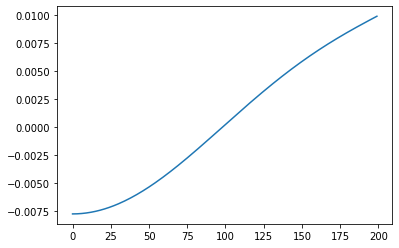

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton_krylov
from numpy import zeros_like, zeros
# parameters
nx = 200
hx  = 1./(nx-1)

amp = 10
def u(x):
	return amp*x*x

P_left, P_right = 1, 0.01

_lambda = 10.5

pi2 = np.pi *np.pi

def Energy(P):
    up = [u(i*hx)*p for i, p in enumerate(P) ]
    return  up - _lambda * P 

def L_operator(P):
    d2x = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = 2*(P[1]    - P[0])/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx
    up = [u(i*hx)*p for i, p in enumerate(P) ]
    return d2x  - up  + _lambda * P 

# solve
guess = zeros(nx, float) + 1
#guess = [ np.exp(-u(i*hx-0.5)) for i in range(nx) ]
sol = newton_krylov(L_operator, guess, method='lgmres', maxiter= 1000, verbose=1)
print('L_operator: %g' % abs(L_operator(sol)).max())

plt.plot(sol, label='sol');


In [61]:
from ipywidgets import interactive
MAX_N = 1000
def plot_func(index, a):
	global _lambda
	global amp
	_lambda = index/2.0 
	amp = a*10.0
	#guess = [ np.exp(-u(i*hx-0.5)) for i in range(nx) ]
	guess = zeros(nx, float) + 1
	sol = newton_krylov(L_operator, guess, method='lgmres', maxiter= 1000, verbose=0)
	#print('L_operator: %g' % abs(L_operator(sol)).max())
	plt.plot(sol, label='sol')
	plt.suptitle(f' lambda = {_lambda} amp= {amp}')
	
w = interactive(plot_func, index = (1, MAX_N), a = (1, MAX_N))
w

interactive(children=(IntSlider(value=500, description='index', max=1000, min=1), IntSlider(value=500, descrip…

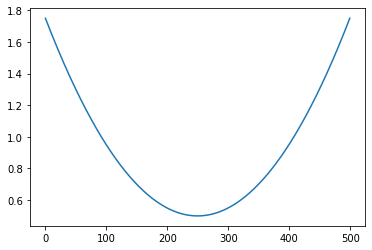

In [32]:
guess = zeros(nx, float) + 0.5
up = [ u(i*hx-0.5)*g for i, g in enumerate(guess) ]
plt.plot(up + guess, label='sol');